In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install imbalanced-learn scikit-learn pandas

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install scikit-learn==1.1.3 imbalanced-learn pandas
import imblearn
import sklearn
import pandas as pd

print(imblearn.__version__)
print(sklearn.__version__)
print(pd.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
0.10.1
1.1.3
2.0.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import iqr
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,make_scorer,roc_auc_score,accuracy_score,f1_score,recall_score
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set(style="whitegrid")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/payment_dataset.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df=df.dropna()

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df=df.drop(columns=['isFlaggedFraud'],axis=1)

In [ ]:
types_selected =['TRANSFER', 'CASH_OUT']
df = df[df['type'].isin(types_selected)]


In [ ]:
print(f'Total count: {len(df)}')

Total count: 573510


In [ ]:
df["newbalanceOrg"] = df["oldbalanceOrg"] - df["amount"]
df["newbalanceDest"] = df["oldbalanceDest"] + df["amount"]

<ipython-input-13-66acbefe1aab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newbalanceOrg"] = df["oldbalanceOrg"] - df["amount"]
<ipython-input-13-66acbefe1aab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newbalanceDest"] = df["oldbalanceDest"] + df["amount"]


In [ ]:
# df['is_customer_to_customer']=((df['nameOrig'].str.startswith("C").astype(int) == 1) & (df['nameDest'].str.startswith("C").astype(int) == 1)).astype(int)

In [ ]:
print(f'Number of rows with is_customer_to_customer = 1 by isFraud: \n {df.isFraud.value_counts()}')

Number of rows with is_customer_to_customer = 1 by isFraud: 
 isFraud
0.0    571962
1.0      1548
Name: count, dtype: int64


In [ ]:
df.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

<ipython-input-16-80880be9a141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)


In [ ]:
label_encoder=LabelEncoder()
df['type']=label_encoder.fit_transform(df['type'])

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'newbalanceOrg'],
      dtype='object')

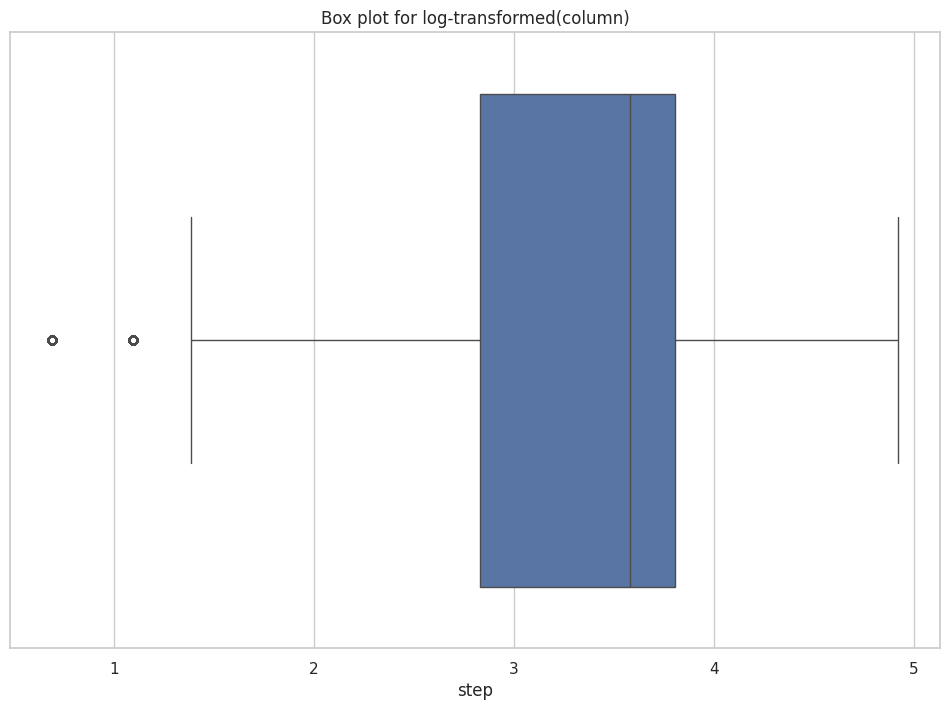

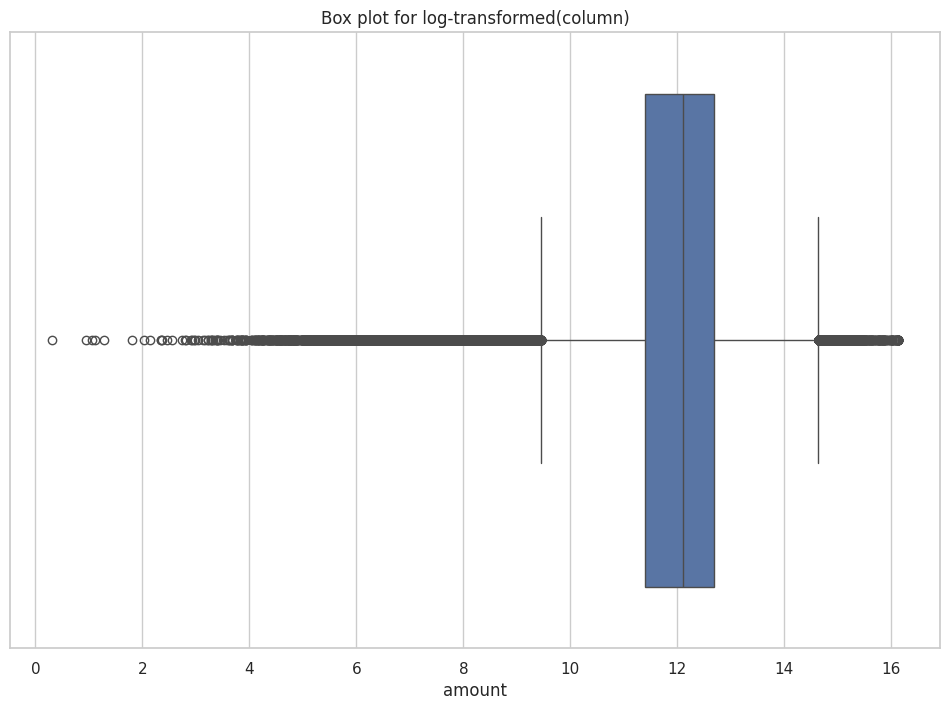

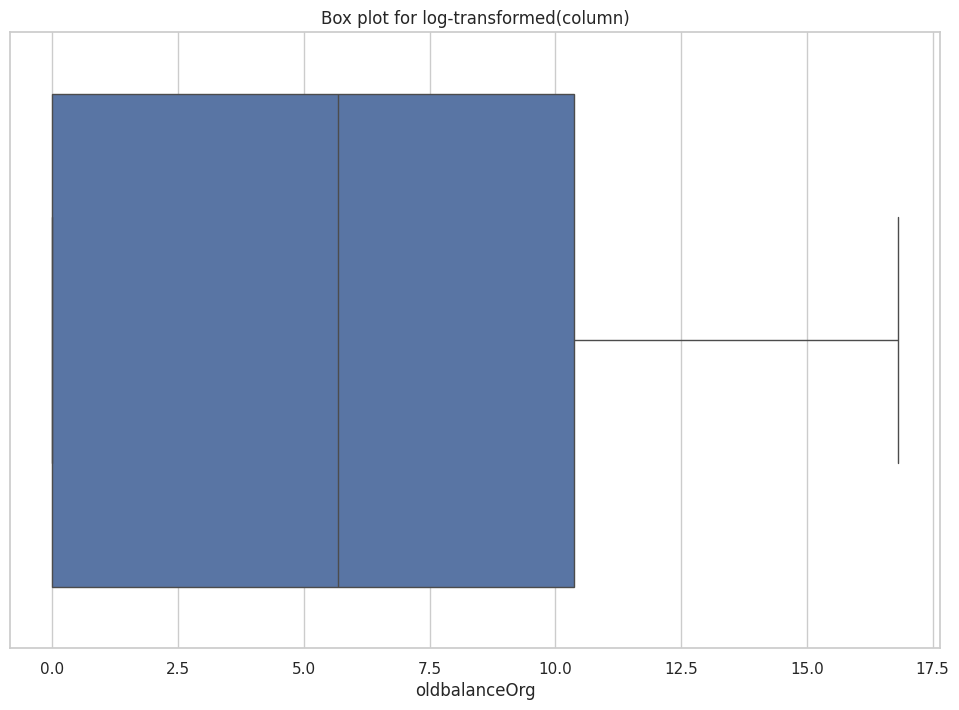

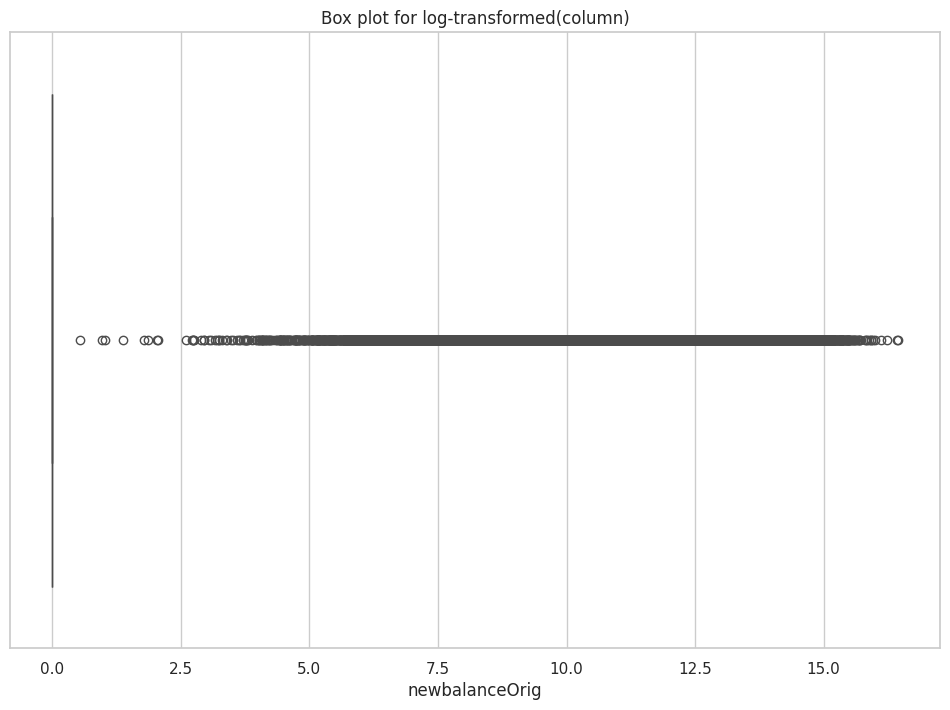

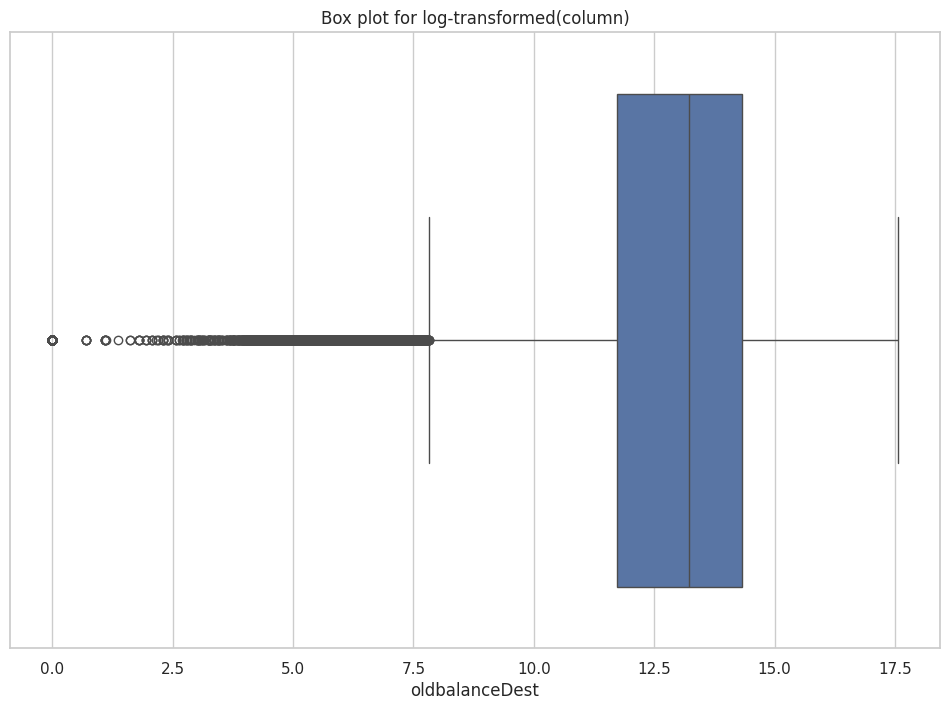

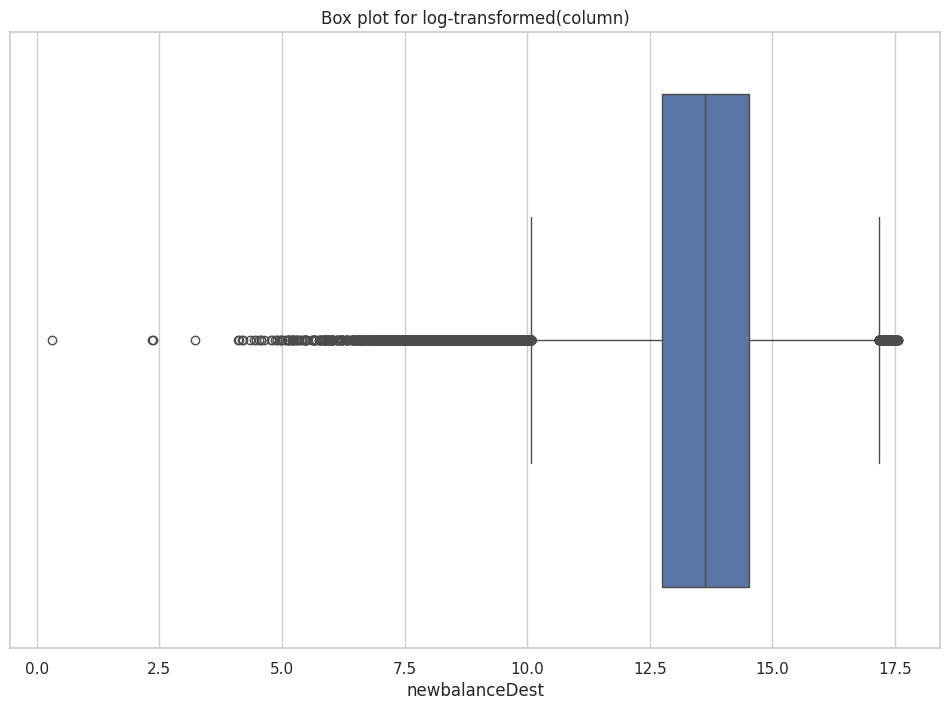

In [ ]:
numeric_columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']
for column in numeric_columns:
  if column!='type':
    plt.figure(figsize=(12,8))
    sns.boxplot(x=np.log1p(df[column]))
    plt.title(f'Box plot for log-transformed(column)')
    plt.show()

In [ ]:
for column in numeric_columns:
  column_data =df[column]
  column_iqr = iqr(column_data)
  print(f'IQR for {column}: {column_iqr}')

IQR for step: 28.0
IQR for amount: 235742.8675
IQR for oldbalanceOrg: 32208.0
IQR for newbalanceOrig: 0.0
IQR for oldbalanceDest: 1548094.9625
IQR for newbalanceDest: 1675152.0275


In [ ]:
for column in numeric_columns:
  df[column]=np.log1p(df[column])

robust_scaler = RobustScaler()
df[numeric_columns] = robust_scaler.fit_transform(df[numeric_columns])

In [ ]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,newbalanceOrg
2,-2.969207,1,-5.319230,-0.045873,0.0,-5.074342,-4.743865,1.0,0.00
3,-2.969207,0,-5.319230,-0.045873,0.0,-1.252367,-2.058427,1.0,0.00
15,-2.969207,0,0.177752,0.381227,0.0,-1.799939,-0.709048,0.0,-213808.94
19,-2.969207,1,0.129832,0.084725,0.0,-1.230487,-0.700646,0.0,-214605.30
24,-2.969207,1,0.414701,0.347828,0.0,-1.719609,-0.536805,0.0,-300850.89
...,...,...,...,...,...,...,...,...,...
1307250,1.372914,1,0.785251,-0.547223,0.0,0.328572,0.442851,0.0,-504300.41
1307251,1.372914,1,0.450144,-0.547223,0.0,0.899212,1.127732,0.0,-326366.51
1307252,1.372914,1,-0.084197,-0.547223,0.0,0.731344,0.874327,0.0,-163065.70
1307253,1.372914,1,0.656133,-0.547223,0.0,0.092978,0.178953,0.0,-426455.18


In [ ]:
x=df.drop(columns='isFraud')
y=df.isFraud

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
undersampler =RandomUnderSampler(sampling_strategy=0.1,random_state=42)
x_test_under, y_test_under=undersampler.fit_resample(x_test,y_test)

In [ ]:

print("\nClass distribution after Ranom undersampling: ")
print(y_test_under.value_counts())


Class distribution after Ranom undersampling: 
isFraud
0.0    3180
1.0     318
Name: count, dtype: int64


### **Model Selection (SVC,RandomForestClassifier,Logistic Regession)**

In [ ]:

print("\nClass distribution before SMOTE oversampling: ")
print(y_train.value_counts())

smote=SMOTE(sampling_strategy=0.1 ,random_state=42)
x_train_over_sampling, y_train_over_sampling = smote.fit_resample(x_train,y_train)


print("\nClass distribution after SMOTE oversampling: ")
print(y_train_over_sampling.value_counts())


Class distribution before SMOTE oversampling: 
isFraud
0.0    457578
1.0      1230
Name: count, dtype: int64

Class distribution after SMOTE oversampling: 
isFraud
0.0    457578
1.0     45757
Name: count, dtype: int64


In [ ]:
rf_model=RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(x_train_over_sampling,y_train_over_sampling)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf_model.predict(x_test_under)
print(f'Metrics of {rf_model}')
print(f'Accuracy_score \n\n',accuracy_score(y_pred,y_test_under))
print(f'Classification Report: \n\n',classification_report(y_pred,y_test_under))

Metrics of RandomForestClassifier(random_state=42)
Accuracy_score 

 0.9974271012006861
Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3189
         1.0       0.97      1.00      0.99       309

    accuracy                           1.00      3498
   macro avg       0.99      1.00      0.99      3498
weighted avg       1.00      1.00      1.00      3498



In [ ]:
model_dict={'svm':SVC(kernel='rbf',C=30),'logistic_model':LogisticRegression(random_state=42),'rf_model':RandomForestClassifier(random_state=42)}


In [ ]:
def model_prediction(model, x_train, y_train, x_test, y_test):
    try:
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        print(f'Metrics of {model}')
        accuracy = accuracy_score(y_test, y_pred_under)
        print(f'Accuracy Score: {accuracy}\n')
        report = classification_report(y_test, y_pred_under)
        print(f'Classification Report:\n{report}')

    except Exception as e:
        print(f'An error occurred: {e}')

In [ ]:
for model_name,model_instance in model_dict.items():
  print(f'\nEvaluating model: {model_name}\n')
  model_prediction(model_instance,x_train_over_sampling,y_train_over_sampling,x_test,y_test)


Evaluating model: svm



In [ ]:
print("\nClass distribution before random undersampling: ")
print(y_train.value_counts())

undersampler =RandomUnderSampler(sampling_strategy=0.1,random_state=42)
x_train_under_sampled, y_train_under_sampled=undersampler.fit_resample(x_train,y_train)

print("\nClass distribution after ramdom undersampling: ")
print(y_train_under_sampled.value_counts())

In [ ]:
for model_name,model_instance in model_dict.items():
  print(f'\nEvaluating model: {model_name}\n')
  model_prediction(model_instance,x_train_under_sampled, y_train_under_sampled,x_test,y_test)

## **Hyperparameter Tuning of RandomforestClassifier**

In [ ]:
params= {
    'n_estimators': [100,150,200],
    'max_depth':[None,10,20],
    'min_samples_split':[5,10,15,20],
    'min_samples_leaf':[1,2,4],
    'class_weight':['balanced']
}

scoring = {
    'f1':make_scorer(f1_score),
    'roc_auc':make_scorer(roc_auc_score),
    'recall':make_scorer(recall_score)
}

In [ ]:
random_search=RandomizedSearchCV(rf_model,param_distributions=params,n_iter=5,scoring=scoring,refit='f1')
random_search.fit(x_train_under_sampled, y_train_under_sampled)

In [ ]:
best_params= random_search.best_params_
best_rf_model =RandomForestClassifier(**best_params)
best_rf_model.fit(x_train_under_sampled, y_train_under_sampled)

In [ ]:
model_prediction(best_rf_model,x_train_under_sampled, y_train_under_sampled,x_test,y_test)